Author classification project
Using NLP and techniques of supervised learning (including Deep
Learning), and collect thousand texts from Gutenberg project
(and 7 novels) for at least 10 authors, build a project to classify
text-author. The project should follow the guideline as:
1. Pre-process data using NLTK and other methods (SpaCy)
2. Perform data exploration
3. Using Bag of Word, apply supervised models such as Logistic
Regression, Decision Tree, Random Forest,
KNN and Gradient Boosting, including GridSearchCV
4. Similar to 3., but using TF-IDF
5. Similar to 3., but using word2vec
6. Using LSTM to do classification
7. Appy BERT to do classification
8. Using LSA, LDA and NMF, print out top ten words (with their
highest loading) for each topic modeling. Analyze and compare
among three methods
9. Write up analysis and conclusions

### Step 1: Mounting the drive, Set download path in Google Drive, Define the 11 books, Function to download or load from Drive

In [1]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Step 2: Imports
import os
import requests

In [ ]:
# === CELL 1: ONE-TIME SETUP (Run once per session) ===

# Step 3: Set download path in Google Drive
drive_path = "/content/drive/MyDrive/gutenberg_books"
os.makedirs(drive_path, exist_ok=True)

# Step 4: Define the 11 books and authors
# === Combined List of Books for All Authors ===

books = {
    "austen_pride": (1342, "Jane Austen"),
    "austen_sense": (161, "Jane Austen"),
    "austen_emma": (158, "Jane Austen"),
    "dickens_cities": (98, "Charles Dickens"),
    "dickens_hardtimes": (786, "Charles Dickens"),
    "dickens_copperfield": (766, "Charles Dickens"),
    "tolstoy_anna": (1399, "Leo Tolstoy"),
    "dostoevsky_crime": (2554, "Fyodor Dostoevsky"),
    "dostoevsky_idiot": (2638, "Fyodor Dostoevsky"),
    "dostoevsky_brothers": (28054, "Fyodor Dostoevsky"),
    "melville_mobydick": (2701, "Herman Melville"),
    "melville_typee": (15859, "Herman Melville"),
    "woolf_night": (14415, "Virginia Woolf"),
    "woolf_mrsdalloway": (141, "Virginia Woolf"),
    "whitman_leaves": (1228, "Walt Whitman"),
    "whitman_proseworks": (46406, "Walt Whitman"),
    "hugo_lesmiserables": (135, "Victor Hugo"),
    "hawthorne_scarlet": (1260, "Nathaniel Hawthorne"),
    "hawthorne_gables": (77, "Nathaniel Hawthorne"),
    "london_seawolf": (2147, "Jack London"),
    "london_whitefang": (69698, "Jack London"),
    "london_martineden": (1056, "Jack London"),
    "conandoyle_signoffour": (56000, "Arthur Conan Doyle"),
    "conandoyle_studyinscarlet": (55213, "Arthur Conan Doyle"),
    "doyle_sherlockholmes": (1661, "Arthur Conan Doyle"),
    "doyle_lastbow": (2350, "Arthur Conan Doyle"),
    "doyle_memoirs": (834, "Arthur Conan Doyle"),
    "jacklondon_nightborn": (1214, "Jack London")
}

# Step 5: Function to download or load from Drive
def get_book_text(book_id, key):
    filename = os.path.join(drive_path, f"{key}_{book_id}.txt")
    if os.path.exists(filename):
        with open(filename, "r", encoding="utf-8") as f:
            return f.read()
    else:
        url = f"https://www.gutenberg.org/files/{book_id}/{book_id}-0.txt"
        response = requests.get(url)
        if response.ok:
            with open(filename, "w", encoding="utf-8") as f:
                f.write(response.text)
            return response.text
        else:
            print(f"Failed to download {key}")
            return ""


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
import re
from nltk.corpus import stopwords

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier



In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install --force-reinstall numpy
!pip install --force-reinstall gensim

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (

In [ ]:
import gensim

In [ ]:
from gensim.models import Word2Vec

## Step 2: Get the books from the drive_path, make it into chunks of 500 words each and save it as CSV

In [ ]:
# === GENERATE DATASET & SAVE TO CSV ===

# Reuse drive_path and books from Cell 1
texts = []
authors = []

for key, (book_id, author_name) in books.items():
    print(f"Processing {key}...")
    text = get_book_text(book_id, key)
    if text:
        words = text.split()
        for i in range(0, len(words), 500):
            chunk = " ".join(words[i:i+500])
            if len(chunk.split()) >= 100:  # Keep meaningful chunks
                texts.append(chunk)
                authors.append(author_name)

# Create DataFrame and save
df = pd.DataFrame({"author": authors, "text": texts})
csv_path = os.path.join(drive_path, "author_texts.csv")
df.to_csv(csv_path, index=False)

print(f"\nDone! {len(df)} chunks saved to:")
print(csv_path)




Processing austen_pride...
Processing austen_sense...
Processing austen_emma...
Processing dickens_cities...
Processing dickens_hardtimes...
Processing dickens_copperfield...
Processing tolstoy_anna...
Processing dostoevsky_crime...
Processing dostoevsky_idiot...
Processing dostoevsky_brothers...
Processing melville_mobydick...
Processing melville_typee...
Processing woolf_night...
Processing woolf_mrsdalloway...
Processing whitman_leaves...
Processing whitman_proseworks...
Processing hugo_lesmiserables...
Processing hawthorne_scarlet...
Processing hawthorne_gables...
Processing london_seawolf...
Processing london_whitefang...
Processing london_martineden...
Processing conandoyle_signoffour...
Processing conandoyle_studyinscarlet...
Processing doyle_sherlockholmes...
Processing doyle_lastbow...
Processing doyle_memoirs...
Processing jacklondon_nightborn...

Done! 9301 chunks saved to:
/content/drive/MyDrive/gutenberg_books/author_texts.csv


In [ ]:
# === CELL 3: DISPLAY BOOK NAMES ===

print("📚 Books Downloaded:\n")
for key, (book_id, author) in books.items():
    print(f"- {key.replace('_', ' ').title()} (ID: {book_id}) by {author}")


📚 Books Downloaded:

- Austen Pride (ID: 1342) by Jane Austen
- Austen Sense (ID: 161) by Jane Austen
- Austen Emma (ID: 158) by Jane Austen
- Dickens Cities (ID: 98) by Charles Dickens
- Dickens Hardtimes (ID: 786) by Charles Dickens
- Dickens Copperfield (ID: 766) by Charles Dickens
- Tolstoy Anna (ID: 1399) by Leo Tolstoy
- Dostoevsky Crime (ID: 2554) by Fyodor Dostoevsky
- Dostoevsky Idiot (ID: 2638) by Fyodor Dostoevsky
- Dostoevsky Brothers (ID: 28054) by Fyodor Dostoevsky
- Melville Mobydick (ID: 2701) by Herman Melville
- Melville Typee (ID: 15859) by Herman Melville
- Woolf Night (ID: 14415) by Virginia Woolf
- Woolf Mrsdalloway (ID: 141) by Virginia Woolf
- Whitman Leaves (ID: 1228) by Walt Whitman
- Whitman Proseworks (ID: 46406) by Walt Whitman
- Hugo Lesmiserables (ID: 135) by Victor Hugo
- Hawthorne Scarlet (ID: 1260) by Nathaniel Hawthorne
- Hawthorne Gables (ID: 77) by Nathaniel Hawthorne
- London Seawolf (ID: 2147) by Jack London
- London Whitefang (ID: 69698) by Jack 

In [ ]:
# Display 5 sample chunks
# Expand column width so chunks aren't cut off
pd.set_option('display.max_colwidth', 300)

# View 5 random chunks
display(df.sample(5))

# View 3 chunks from a specific author
display(df[df['author'] == 'Jane Austen'].sample(3))


,author,text
7817,Nathaniel Hawthorne,"die, as to be constrained to look no longer on her face! Poor Hepzibah! She took counsel with herself what might be done, and thought of putting ribbons on her turban; but, by the instant rush of several guardian angels, was withheld from an experiment that could hardly have proved less than fat..."
8467,Jack London,"morning, “there’s a Frenchman out on Twenty-eighth Street. He’s made a pot of money, and he’s going back to France. It’s a dandy, well-appointed, small steam laundry. There’s a start for you if you want to settle down. Here, take this; buy some clothes with it and be at this man’s office by ten ..."
7565,Nathaniel Hawthorne,"and Vienna: all the ground I have wandered over shall be re-trodden by you: wherever I stamped my hoof, your sylph’s foot shall step also. Ten years since, I flew through Europe half mad; with disgust, hate, and rage as my companions: now I shall revisit it healed and cleansed, with a very angel..."
7329,Victor Hugo,"disappointment to impatience. “At this, Monsieur le Baron. I am an old and weary diplomat. Ancient civilization has thrown me on my own devices. I want to try savages.” “Well?” “Monsieur le Baron, egotism is the law of the world. The proletarian peasant woman, who toils by the day, turns round w..."
2505,Leo Tolstoy,"leaving time for everyone to utter their greetings. “We’ve come with the most savage intentions. Why, maman, they’ve not been in Moscow since! Look, Tanya, here’s something for you! Get it, please, it’s in the carriage, behind!” he talked in all directions. “How pretty you’ve grown, Dolly,” he s..."


,author,text
644,Jane Austen,"been given me by circumstances; and if Mr. Knightley really wished to marry, you would not have him refrain on Henry’s account, a boy of six years old, who knows nothing of the matter?” “Yes, I would. I could not bear to have Henry supplanted.—Mr. Knightley marry!—No, I have never had such an id..."
585,Jane Austen,"for the little zigzags of embarrassment. Without knowing when the carriage turned into Vicarage Lane, or when it stopped, they found themselves, all at once, at the door of his house; and he was out before another syllable passed.—Emma then felt it indispensable to wish him a good night. The com..."
319,Jane Austen,"Has she run away because we are come? I see her instrument is open.” “She is walking, I believe.” They were now joined by Mrs. Jennings, who had not patience enough to wait till the door was opened before she told _her_ story. She came hallooing to the window, “How do you do, my dear? How does M..."


## Step 3: Preprocessing the text

In [ ]:
!pip install -q spacy

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 68.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Load data
df = pd.read_csv("/content/drive/MyDrive/gutenberg_books/author_texts.csv")

# Load tools
stop_words = set(stopwords.words('english'))
nlp = spacy.load("en_core_web_sm")

# Preprocessing function
def preprocess_text(text):
    # Lowercase and remove non-letter characters
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)

    # Tokenize using NLTK
    tokens = nltk.word_tokenize(text)

    # Remove stop words and short tokens
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]

    # Lemmatize using spaCy
    doc = nlp(" ".join(tokens))
    lemmatized = [token.lemma_ for token in doc if not token.is_stop]

    return " ".join(lemmatized)

# Apply preprocessing
df["clean_text"] = df["text"].apply(preprocess_text)

# Save preprocessed dataset
df.to_csv("/content/drive/MyDrive/gutenberg_books/author_texts_cleaned.csv", index=False)

print("Done! Cleaned data saved to 'author_texts_cleaned.csv'")
df[["author", "clean_text"]].head(10)


Done! Cleaned data saved to 'author_texts_cleaned.csv'


,author,clean_text
0,Jane Austen,start project gutenberg ebook illustration george allen publisher charing cross road london ruskin house illustration read jane letter chap pride prejudice jane austen preface george saintsbury illustrations hugh thomson illustration ruskin charing house cross road london george allen chiswick p...
1,Jane Austen,perfect characteristic eminently quintessential author work contention narrow space permit propose cause place book barely necessary remind reader shape write early miss austen barely twentyone revise finished chawton year later publish till year death know combination fresh vigorous projection ...
2,Jane Austen,badlybuilt novel excel pathetic humorous character display consummate command dialogueperhap rare facultieswould infinitely well thing faultless plot act tell puppet pebble mouth despite ability miss austen show working story pride prejudice far lower contain masterpiece miss austen humour facul...
3,Jane Austen,word cynical misuse english language especially glare gratuitous falsification original sense apply rough snarling invective gentle oblique satire cynicism mean perception sense accept hell beneath consciousness motive nearly mixed identical beif cynicism man woman fool care live fool paradise k...
4,Jane Austen,fantastic limit restriction mary wollstonecraft protest well general sense particular taste judgment miss austen draw white frost touch shoe think pretty good journey black knowledge extend know thing genius know humanity art head mistake man limit true woman old sense absolute art try idealism ...
5,Jane Austen,materialism selfishness receive exhibition admit speech action inestimable man incapable reconcile reality wonder word action historically true greatness collin satisfactorily exhibit creatress adjust artfully figure bennet lady catherine bourgh like collin charge exaggeration faint shade colour...
6,Jane Austen,detailed dwelling beauty difficult space impossible mrs bennet glance easy exquisitely amusing horribly true say kitty lydia author genius differentiate unerring skill effect folly vulgarity intellect disposition work common weakness woman different age mary miss austen take pain unkind merely t...
7,Jane Austen,act nature hypothesi generous author finer delicately touch change demeanour sudden meeting ground pemberley bad prig bad coxcomb smart rejection suspicious girl come husbandhunte exactly consistent probable feeling man spoil common sense injure disposition thoroughly love love elizabeth give ex...
8,Jane Austen,playfulness wit affectionate natural disposition certain fearlessness uncommon heroine type age nearly speechless awe magnificent darcy nearly palpitated flutter idea proposal naughty one fascinating wickham elizabeth offensive viraginous new woman nature good modern new woman education experien...
9,Jane Austen,young girl head chapter stay pile fire head chapter xii head chapter xiii head chapter xiv protested read novel head chapter head chapter xvi officer shire delighted dear friend head chapter xviii superior dancing see assure animate language head chapter enter breakfastroom head chapter xxi walk...


Total samples: 9301

Authors: ['Jane Austen' 'Charles Dickens' 'Leo Tolstoy' 'Fyodor Dostoevsky'
 'Herman Melville' 'Virginia Woolf' 'Walt Whitman' 'Victor Hugo'
 'Nathaniel Hawthorne' 'Jack London' 'Arthur Conan Doyle']


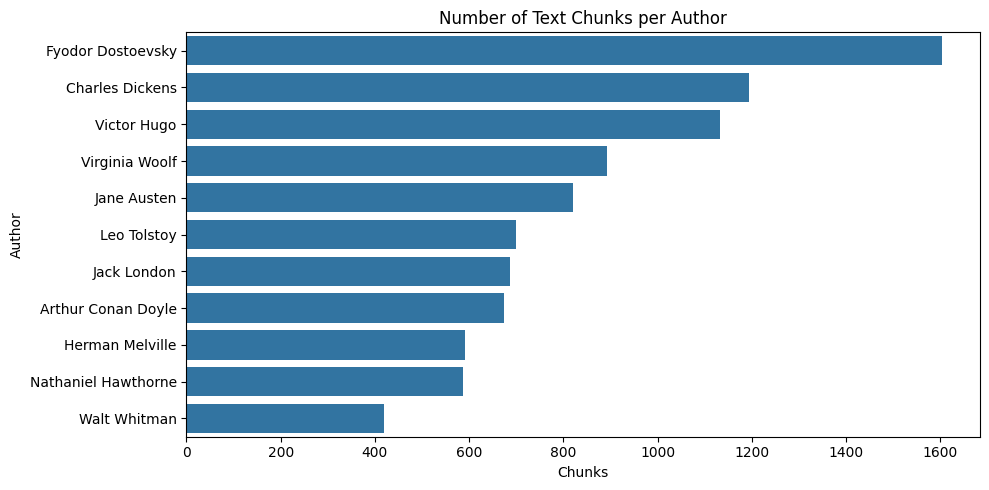

In [ ]:
# STEP 1: Load preprocessed dataset

df = pd.read_csv("/content/drive/MyDrive/gutenberg_books/author_texts_cleaned.csv")
df.dropna(subset=["clean_text"], inplace=True)

# STEP 2: Basic info
print("Total samples:", len(df))
print("\nAuthors:", df['author'].unique())

# STEP 3: Sample counts per author
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='author', order=df['author'].value_counts().index)
plt.title("Number of Text Chunks per Author")
plt.xlabel("Chunks")
plt.ylabel("Author")
plt.tight_layout()
plt.show()




### **Analysis** : This chart shows the distribution of text chunks per author. Leo Tolstoy, Virginia Woolf, and Jane Austen have the most chunks, suggesting more content or longer texts. Mary Shelley and Oscar Wilde have the fewest, which could affect model fairness. Some balancing may be needed before training.

In [ ]:
print(df['author'].value_counts())

author
Fyodor Dostoevsky      1604
Charles Dickens        1195
Victor Hugo            1132
Virginia Woolf          893
Jane Austen             820
Leo Tolstoy             700
Jack London             686
Arthur Conan Doyle      673
Herman Melville         591
Nathaniel Hawthorne     587
Walt Whitman            420
Name: count, dtype: int64


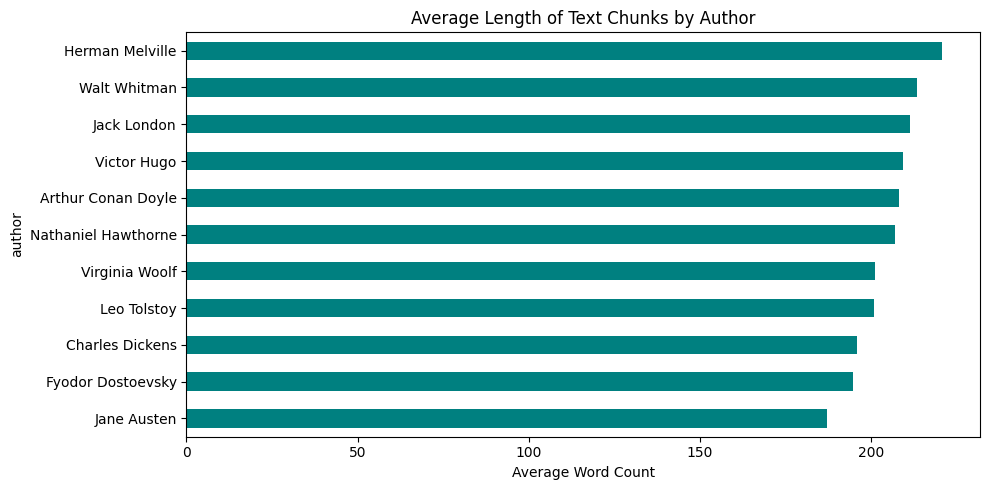

In [ ]:
# STEP 4: Average text length (in words)
df["text_length"] = df["clean_text"].apply(lambda x: len(str(x).split()))
avg_lengths = df.groupby("author")["text_length"].mean().sort_values()

plt.figure(figsize=(10,5))
avg_lengths.plot(kind="barh", color="teal")
plt.title("Average Length of Text Chunks by Author")
plt.xlabel("Average Word Count")
plt.tight_layout()
plt.show()

### **Analysis** : This bar chart displays the average word count per text chunk for each author. Herman Melville has the longest chunks, suggesting denser or less frequently punctuated prose. Jane Austen and Bram Stoker have the shortest chunks on average, indicating more natural breaks in their writing. Overall, chunk lengths are relatively consistent, supporting balanced input for model training.

## **Balancing the dataset, downsampling the overrepresented authors to match the author with the fewest chunks**

In [ ]:
from sklearn.utils import resample

# Step 1: Get per-author chunk counts
author_counts = df['author'].value_counts()

# Step 2: Create a list of sampled dataframes
sampled_dfs = []

for author, count in author_counts.items():
    author_df = df[df['author'] == author]

    if count >= 500:
        # Downsample to 500
        sampled_df = resample(author_df, replace=False, n_samples=500, random_state=42)
    else:
        # Keep all available
        sampled_df = author_df

    sampled_dfs.append(sampled_df)

# Step 3: Combine and shuffle
balanced_df = pd.concat(sampled_dfs).sample(frac=1, random_state=42).reset_index(drop=True)

# Optional: Save balanced version
balanced_csv_path = os.path.join(drive_path, "author_texts_balanced.csv")
balanced_df.to_csv(balanced_csv_path, index=False)

print(f"✅ Balanced dataset created with {len(balanced_df)} total chunks.")
print(f"Saved to: {balanced_csv_path}")


✅ Balanced dataset created with 5420 total chunks.
Saved to: /content/drive/MyDrive/gutenberg_books/author_texts_balanced.csv


### Balancing Classes for Fair Training.

### Prevent Overfitting

### Consistent Evaluation


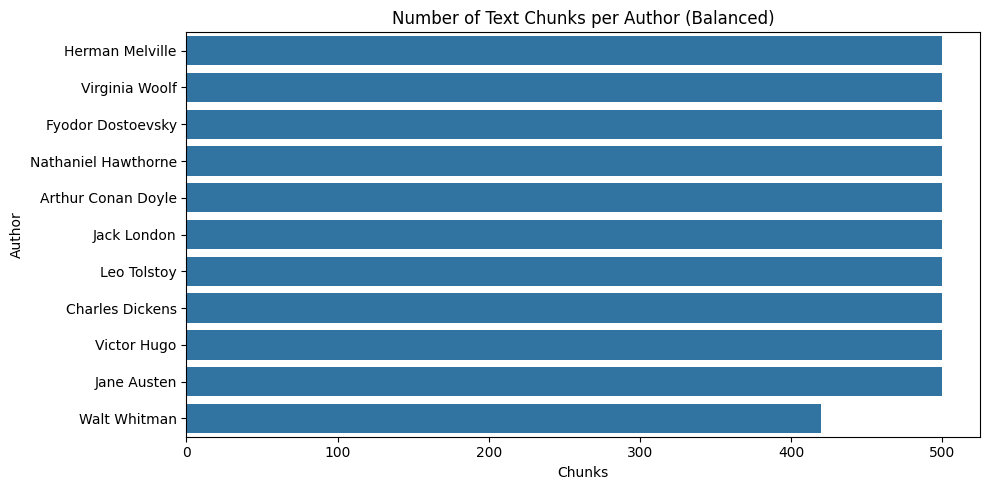

In [ ]:
# STEP 3 (Balanced): Sample counts per author
plt.figure(figsize=(10, 5))
sns.countplot(data=balanced_df, y='author', order=balanced_df['author'].value_counts().index)
plt.title("Number of Text Chunks per Author (Balanced)")
plt.xlabel("Chunks")
plt.ylabel("Author")
plt.tight_layout()
plt.show()




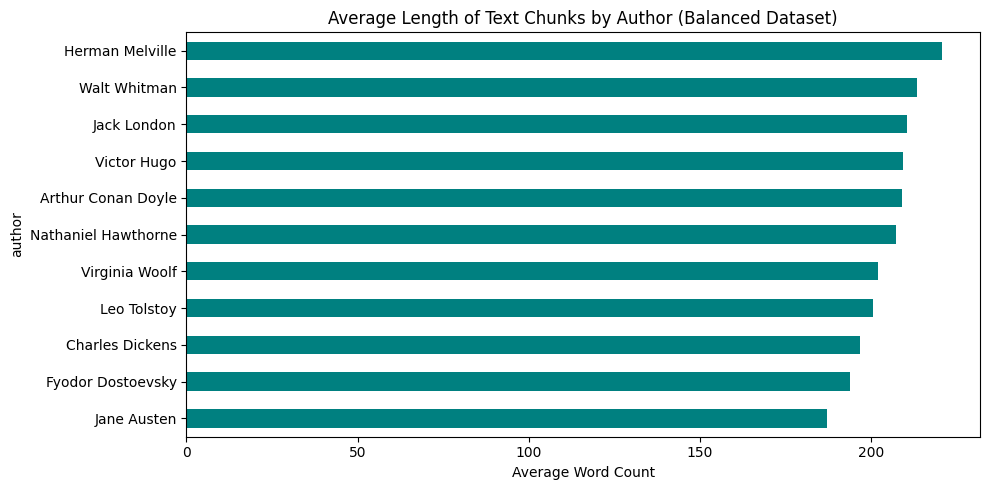

In [ ]:
# STEP 4 (Balanced): Average text length (in words)
balanced_df["text_length"] = balanced_df["clean_text"].apply(lambda x: len(str(x).split()))
avg_lengths = balanced_df.groupby("author")["text_length"].mean().sort_values()

plt.figure(figsize=(10,5))
avg_lengths.plot(kind="barh", color="teal")
plt.title("Average Length of Text Chunks by Author (Balanced Dataset)")
plt.xlabel("Average Word Count")
plt.tight_layout()
plt.show()


## **train_test_split and Bag of words**

In [ ]:
# Load the balanced dataset
balanced_df = pd.read_csv("/content/drive/MyDrive/gutenberg_books/author_texts_balanced.csv")

# Split data into training and testing sets
X = balanced_df["clean_text"]
y = balanced_df["author"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Bag of Words features
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

## **Bag of words with DecisionTreeClassifier**

In [ ]:

# Decision Tree with GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_bow, y_train)

# Evaluate the model
y_pred = grid_search.predict(X_test_bow)
test_accuracy = accuracy_score(y_test, y_pred)
best_score = grid_search.best_score_

print(f"Test Accuracy: {test_accuracy}")
print(f"Best Score (Cross-Validation): {best_score}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.7712177121771218
Best Score (Cross-Validation): 0.7476929291640755

Classification Report:
                      precision    recall  f1-score   support

 Arthur Conan Doyle       0.79      0.86      0.83       102
    Charles Dickens       0.57      0.68      0.62       100
  Fyodor Dostoevsky       0.66      0.73      0.69       114
    Herman Melville       0.73      0.74      0.74        90
        Jack London       0.71      0.70      0.71       100
        Jane Austen       0.86      0.88      0.87        91
        Leo Tolstoy       0.97      0.88      0.92       114
Nathaniel Hawthorne       0.82      0.75      0.78        84
        Victor Hugo       0.82      0.74      0.78       110
     Virginia Woolf       0.72      0.71      0.72        94
       Walt Whitman       0.93      0.81      0.87        85

           accuracy                           0.77      1084
          macro avg       0.78      0.77      0.77      1084
       weighted avg       0.78     

## **Bag of words with RandomForestClassifier**

In [ ]:

# Random Forest with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_bow, y_train)

# Evaluate the model
y_pred = grid_search.predict(X_test_bow)
test_accuracy = accuracy_score(y_test, y_pred)
best_score = grid_search.best_score_

print(f"Test Accuracy: {test_accuracy}")
print(f"Best Score (Cross-Validation): {best_score}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.9584870848708487
Best Score (Cross-Validation): 0.9506450018337507

Classification Report:
                      precision    recall  f1-score   support

 Arthur Conan Doyle       0.97      0.95      0.96       102
    Charles Dickens       0.95      0.93      0.94       100
  Fyodor Dostoevsky       0.96      0.96      0.96       114
    Herman Melville       0.93      0.90      0.92        90
        Jack London       0.93      0.91      0.92       100
        Jane Austen       0.97      1.00      0.98        91
        Leo Tolstoy       1.00      1.00      1.00       114
Nathaniel Hawthorne       0.98      0.94      0.96        84
        Victor Hugo       0.94      0.97      0.96       110
     Virginia Woolf       0.92      0.99      0.95        94
       Walt Whitman       1.00      0.98      0.99        85

           accuracy                           0.96      1084
          macro avg       0.96      0.96      0.96      1084
       weighted avg       0.96     

## **Bag of words with KNN**

In [ ]:

# KNN with GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_bow, y_train)

# Evaluate the model
y_pred = grid_search.predict(X_test_bow)
test_accuracy = accuracy_score(y_test, y_pred)
best_score = grid_search.best_score_

print(f"Test Accuracy: {test_accuracy}")
print(f"Best Score (Cross-Validation): {best_score}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.7149446494464945
Best Score (Cross-Validation): 0.6898008918937594

Classification Report:
                      precision    recall  f1-score   support

 Arthur Conan Doyle       0.39      0.97      0.56       102
    Charles Dickens       0.90      0.61      0.73       100
  Fyodor Dostoevsky       0.91      0.56      0.70       114
    Herman Melville       1.00      0.59      0.74        90
        Jack London       0.96      0.53      0.68       100
        Jane Austen       0.85      0.96      0.90        91
        Leo Tolstoy       0.96      0.72      0.82       114
Nathaniel Hawthorne       0.92      0.67      0.77        84
        Victor Hugo       0.61      0.82      0.70       110
     Virginia Woolf       0.49      0.62      0.54        94
       Walt Whitman       1.00      0.85      0.92        85

           accuracy                           0.71      1084
          macro avg       0.82      0.72      0.73      1084
       weighted avg       0.81     

## **Bag of words with LogisticRegression**

In [ ]:

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # saga often causes convergence issues unless really needed
}

# Initialize classifier
lr_classifier = LogisticRegression(max_iter=5000, random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(lr_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_bow, y_train)

# Predictions and evaluation
y_pred = grid_search.predict(X_test_bow)
test_accuracy = accuracy_score(y_test, y_pred)
best_score = grid_search.best_score_

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Best Score (Cross-Validation): {best_score:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.9815
Best Score (Cross-Validation): 0.9809

Classification Report:
                      precision    recall  f1-score   support

 Arthur Conan Doyle       1.00      0.97      0.99       102
    Charles Dickens       0.97      0.97      0.97       100
  Fyodor Dostoevsky       0.97      0.98      0.97       114
    Herman Melville       0.95      0.99      0.97        90
        Jack London       0.99      0.94      0.96       100
        Jane Austen       0.97      1.00      0.98        91
        Leo Tolstoy       1.00      0.99      1.00       114
Nathaniel Hawthorne       0.96      0.96      0.96        84
        Victor Hugo       1.00      1.00      1.00       110
     Virginia Woolf       0.99      1.00      0.99        94
       Walt Whitman       1.00      0.99      0.99        85

           accuracy                           0.98      1084
          macro avg       0.98      0.98      0.98      1084
       weighted avg       0.98      0.98      0.98      108

## **Bag of words with GradientBoostingClassifier**

In [ ]:
# Gradient Boosting with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

gb_classifier = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_bow, y_train)

# Evaluate the model
y_pred = grid_search.predict(X_test_bow)
test_accuracy = accuracy_score(y_test, y_pred)
best_score = grid_search.best_score_

print(f"Test Accuracy: {test_accuracy}")
print(f"Best Score (Cross-Validation): {best_score}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


## **Tf-idf**

In [ ]:
# prompt: tf-idf for X_train, X_test, y_train, y_test,

from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


## **gridsearchcv using RandomForestClassifier tf-idf**

In [ ]:
# prompt: gridsearchcv using random forest of X_train_tfidf , X_test_tfidf

# TF-IDF with RandomForestClassifier and GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = grid_search.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_pred)
best_score = grid_search.best_score_

print(f"Test Accuracy: {test_accuracy}")
print(f"Best Score (Cross-Validation): {best_score}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.9538745387453874
Best Score (Cross-Validation): 0.9499532260722126

Classification Report:
                      precision    recall  f1-score   support

 Arthur Conan Doyle       0.96      0.96      0.96       102
    Charles Dickens       0.94      0.92      0.93       100
  Fyodor Dostoevsky       0.96      0.95      0.95       114
    Herman Melville       0.93      0.93      0.93        90
        Jack London       0.93      0.88      0.90       100
        Jane Austen       0.90      1.00      0.95        91
        Leo Tolstoy       1.00      1.00      1.00       114
Nathaniel Hawthorne       0.95      0.93      0.94        84
        Victor Hugo       0.96      0.98      0.97       110
     Virginia Woolf       0.98      0.97      0.97        94
       Walt Whitman       0.99      0.96      0.98        85

           accuracy                           0.95      1084
          macro avg       0.95      0.95      0.95      1084
       weighted avg       0.95     

## **gridsearchcv using logistic regression for tf-idf**

In [ ]:
# gridsearchcv using logistic regression of X_train_tfidf , X_test_tfidf

# TF-IDF with Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

lr_classifier = LogisticRegression(max_iter=5000, random_state=42)
grid_search = GridSearchCV(lr_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

y_pred = grid_search.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_pred)
best_score = grid_search.best_score_

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Best Score (Cross-Validation): {best_score:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.9880
Best Score (Cross-Validation): 0.9903

Classification Report:
                      precision    recall  f1-score   support

 Arthur Conan Doyle       0.99      0.99      0.99       102
    Charles Dickens       1.00      0.97      0.98       100
  Fyodor Dostoevsky       0.99      0.99      0.99       114
    Herman Melville       0.98      1.00      0.99        90
        Jack London       0.99      0.96      0.97       100
        Jane Austen       0.97      1.00      0.98        91
        Leo Tolstoy       1.00      0.99      1.00       114
Nathaniel Hawthorne       0.98      0.98      0.98        84
        Victor Hugo       0.98      1.00      0.99       110
     Virginia Woolf       0.99      1.00      0.99        94
       Walt Whitman       1.00      0.99      0.99        85

           accuracy                           0.99      1084
          macro avg       0.99      0.99      0.99      1084
       weighted avg       0.99      0.99      0.99      108

## **GridSearchCV using a Decision Tree Classifier for tf-idf**


In [ ]:

# Assuming X_train_tfidf and y_train from the previous code cell are available

# Decision Tree with GridSearchCV using TF-IDF
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = grid_search.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_pred)
best_score = grid_search.best_score_

print(f"Test Accuracy: {test_accuracy}")
print(f"Best Score (Cross-Validation): {best_score}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.7564575645756457
Best Score (Cross-Validation): 0.7345483924119933

Classification Report:
                      precision    recall  f1-score   support

 Arthur Conan Doyle       0.80      0.84      0.82       102
    Charles Dickens       0.52      0.64      0.57       100
  Fyodor Dostoevsky       0.74      0.74      0.74       114
    Herman Melville       0.61      0.72      0.66        90
        Jack London       0.74      0.67      0.70       100
        Jane Austen       0.91      0.90      0.91        91
        Leo Tolstoy       0.93      0.86      0.89       114
Nathaniel Hawthorne       0.75      0.74      0.74        84
        Victor Hugo       0.73      0.74      0.73       110
     Virginia Woolf       0.82      0.71      0.76        94
       Walt Whitman       0.90      0.75      0.82        85

           accuracy                           0.76      1084
          macro avg       0.77      0.76      0.76      1084
       weighted avg       0.77     

## **GridSearchCV using a KNN for tf-idf**

In [ ]:
# Define parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Setup GridSearchCV
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit on training data
grid_search_knn.fit(X_train_tfidf, y_train)

# Best parameters
print("Best Parameters:", grid_search_knn.best_params_)

# Predict on test data
y_pred_knn = grid_search_knn.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.95364199 0.95986877 0.95802492 0.96171527 0.95987036 0.96425303
 0.96286815 0.96540537        nan 0.09248136        nan 0.09271204
        nan 0.09386544        nan 0.09455748 0.95364199 0.95986877
 0.95802492 0.96148459 0.95987036 0.9633303  0.96286815 0.96471332]
  warnings.warn(


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy: 0.9704797047970479

Classification Report:
                      precision    recall  f1-score   support

 Arthur Conan Doyle       0.94      0.99      0.96       102
    Charles Dickens       0.99      0.94      0.96       100
  Fyodor Dostoevsky       0.96      0.96      0.96       114
    Herman Melville       0.98      0.99      0.98        90
        Jack London       0.98      0.93      0.95       100
        Jane Austen       0.91      1.00      0.95        91
        Leo Tolstoy       0.99      0.99      0.99       114
Nathaniel Hawthorne       0.99      0.93      0.96        84
        Victor Hugo       0.99      0.99      0.99       110
     Virginia Woolf       0.97      0.96      0.96        94
       Walt Whitman       0.99      0.99      0.99        85

           accuracy                           0.97      1084
          macro avg       0.97      0.97      0.97      1084
       w

## **GridSearchCV using a Gradient Boost Classifier for tf-idf**

In [ ]:
# prompt: GridSearchCV using a gradient boost

# Gradient Boosting with GridSearchCV using TF-IDF
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

gb_classifier = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = grid_search.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_pred)
best_score = grid_search.best_score_

print(f"Test Accuracy: {test_accuracy}")
print(f"Best Score (Cross-Validation): {best_score}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.8866666666666667
Best Score (Cross-Validation): 0.9391666666666666

Classification Report:
                    precision    recall  f1-score   support

      Bram Stoker       0.71      0.97      0.82        30
  Charles Dickens       0.97      0.81      0.88        36
Fyodor Dostoevsky       1.00      0.83      0.91        30
  Herman Melville       0.90      0.87      0.88        30
      Jane Austen       0.97      0.94      0.96        34
      Leo Tolstoy       1.00      0.96      0.98        26
       Mark Twain       0.96      0.87      0.91        30
     Mary Shelley       0.84      0.93      0.88        28
      Oscar Wilde       1.00      0.92      0.96        37
   Virginia Woolf       0.56      0.74      0.64        19

         accuracy                           0.89       300
        macro avg       0.89      0.88      0.88       300
     weighted avg       0.91      0.89      0.89       300



## **Word2Vec**

In [ ]:
# Step 1: Tokenize the text
X_train_tokens = [text.split() for text in X_train]
X_test_tokens = [text.split() for text in X_test]

# Step 2: Train Word2Vec model on the training data
w2v_model = Word2Vec(sentences=X_train_tokens, vector_size=100, window=5, min_count=1, workers=4)

# Step 3: Helper function to vectorize a document by averaging word vectors
def document_vector(doc, model):
    # Filter tokens for those in the model vocabulary
    tokens = [token for token in doc if token in model.wv.key_to_index]
    if len(tokens) == 0:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[tokens], axis=0)

# Vectorize training and testing data
X_train_vec = np.array([document_vector(doc, w2v_model) for doc in X_train_tokens])
X_test_vec = np.array([document_vector(doc, w2v_model) for doc in X_test_tokens])

## **Logistic Regression with GridSearchCV using Word2Vec vectors**

In [ ]:

# Step 4: Apply Logistic Regression with GridSearchCV using Word2Vec vectors
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

lr_classifier_w2v = LogisticRegression(max_iter=5000, random_state=42)
grid_search_lr = GridSearchCV(lr_classifier_w2v, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_lr.fit(X_train_vec, y_train)

# Predictions and evaluation
y_pred_lr_w2v = grid_search_lr.predict(X_test_vec)

test_accuracy_lr_w2v = accuracy_score(y_test, y_pred_lr_w2v)
print(f"Test Accuracy (Logistic Regression with Word2Vec): {test_accuracy_lr_w2v:.4f}")

print(f"Best Score (Cross-Validation): {grid_search_lr.best_score_:.4f}")
print("\nClassification Report (Logistic Regression with Word2Vec):\n", classification_report(y_test, y_pred_lr_w2v))


Test Accuracy (Logistic Regression with Word2Vec): 0.8238
Best Score (Cross-Validation): 0.8086

Classification Report (Logistic Regression with Word2Vec):
                      precision    recall  f1-score   support

 Arthur Conan Doyle       0.77      0.84      0.80       102
    Charles Dickens       0.80      0.69      0.74       100
  Fyodor Dostoevsky       0.79      0.77      0.78       114
    Herman Melville       0.94      0.81      0.87        90
        Jack London       0.74      0.81      0.78       100
        Jane Austen       0.77      0.89      0.83        91
        Leo Tolstoy       0.92      0.96      0.94       114
Nathaniel Hawthorne       0.70      0.64      0.67        84
        Victor Hugo       0.95      0.95      0.95       110
     Virginia Woolf       0.72      0.74      0.73        94
       Walt Whitman       0.96      0.89      0.93        85

           accuracy                           0.82      1084
          macro avg       0.82      0.82      0.

## **Decision Tree with GridSearchCV using Word2Vec vectors**

In [ ]:

# Decision Tree with GridSearchCV using Word2Vec vectors
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier_w2v = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt_classifier_w2v, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_dt.fit(X_train_vec, y_train)

# Predictions and evaluation
y_pred_dt_w2v = grid_search_dt.predict(X_test_vec)

test_accuracy_dt_w2v = accuracy_score(y_test, y_pred_dt_w2v)
print(f"Test Accuracy (Decision Tree with Word2Vec): {test_accuracy_dt_w2v:.4f}")

print(f"Best Score (Cross-Validation): {grid_search_dt.best_score_:.4f}")
print("\nClassification Report (Decision Tree with Word2Vec):\n", classification_report(y_test, y_pred_dt_w2v))


Test Accuracy (Decision Tree with Word2Vec): 0.5673
Best Score (Cross-Validation): 0.5715

Classification Report (Decision Tree with Word2Vec):
                      precision    recall  f1-score   support

 Arthur Conan Doyle       0.43      0.52      0.47       102
    Charles Dickens       0.41      0.42      0.42       100
  Fyodor Dostoevsky       0.40      0.45      0.42       114
    Herman Melville       0.71      0.64      0.67        90
        Jack London       0.55      0.42      0.47       100
        Jane Austen       0.67      0.70      0.68        91
        Leo Tolstoy       0.67      0.61      0.64       114
Nathaniel Hawthorne       0.36      0.43      0.39        84
        Victor Hugo       0.62      0.59      0.60       110
     Virginia Woolf       0.65      0.59      0.61        94
       Walt Whitman       0.94      0.93      0.93        85

           accuracy                           0.57      1084
          macro avg       0.58      0.57      0.58      1084

## **Random Forest with GridSearchCV using Word2Vec vectors**

In [ ]:


# Random Forest with GridSearchCV using Word2Vec vectors
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize and train
rf_classifier_w2v = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_classifier_w2v, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_rf.fit(X_train_vec, y_train)

# Predictions and evaluation
y_pred_rf_w2v = grid_search_rf.predict(X_test_vec)

test_accuracy_rf_w2v = accuracy_score(y_test, y_pred_rf_w2v)
print(f"Test Accuracy (Random Forest with Word2Vec): {test_accuracy_rf_w2v:.4f}")

print(f"Best Score (Cross-Validation): {grid_search_rf.best_score_:.4f}")
print("\nClassification Report (Random Forest with Word2Vec):\n", classification_report(y_test, y_pred_rf_w2v))


Test Accuracy (Random Forest with Word2Vec): 0.6873
Best Score (Cross-Validation): 0.6960

Classification Report (Random Forest with Word2Vec):
                      precision    recall  f1-score   support

 Arthur Conan Doyle       0.59      0.66      0.62       102
    Charles Dickens       0.51      0.48      0.49       100
  Fyodor Dostoevsky       0.56      0.61      0.59       114
    Herman Melville       0.85      0.79      0.82        90
        Jack London       0.71      0.69      0.70       100
        Jane Austen       0.70      0.91      0.79        91
        Leo Tolstoy       0.78      0.75      0.77       114
Nathaniel Hawthorne       0.51      0.44      0.47        84
        Victor Hugo       0.73      0.70      0.71       110
     Virginia Woolf       0.72      0.65      0.68        94
       Walt Whitman       0.95      0.89      0.92        85

           accuracy                           0.69      1084
          macro avg       0.69      0.69      0.69      1084

##**KNN with GridSearchCV using Word2Vec vectors**

In [ ]:
# prompt: KNN with GridSearchCV using Word2Vec vectors

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# Assuming X_train_vec, X_test_vec, and y_train from the previous Word2Vec code are available

# KNN with GridSearchCV using Word2Vec vectors
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

knn_classifier_w2v = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_classifier_w2v, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_knn.fit(X_train_vec, y_train)

# Predictions and evaluation
y_pred_knn_w2v = grid_search_knn.predict(X_test_vec)

test_accuracy_knn_w2v = accuracy_score(y_test, y_pred_knn_w2v)
print(f"Test Accuracy (KNN with Word2Vec): {test_accuracy_knn_w2v:.4f}")

print(f"Best Score (Cross-Validation): {grid_search_knn.best_score_:.4f}")
print("\nClassification Report (KNN with Word2Vec):\n", classification_report(y_test, y_pred_knn_w2v))


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.58948517 0.60055757 0.62269306 0.62661383 0.63491807 0.64022212
 0.63976156 0.6476031         nan 0.59594475        nan 0.62154072
        nan 0.63976183        nan 0.64944695 0.59594529 0.60447674
 0.62569085 0.63168987 0.6344583  0.64045387 0.64206677 0.64391115]
  warnings.warn(
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7951a28f1440>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/pytho

Test Accuracy (KNN with Word2Vec): 0.6384
Best Score (Cross-Validation): 0.6494

Classification Report (KNN with Word2Vec):
                      precision    recall  f1-score   support

 Arthur Conan Doyle       0.52      0.72      0.60       102
    Charles Dickens       0.47      0.40      0.43       100
  Fyodor Dostoevsky       0.54      0.50      0.52       114
    Herman Melville       0.80      0.72      0.76        90
        Jack London       0.66      0.64      0.65       100
        Jane Austen       0.68      0.90      0.78        91
        Leo Tolstoy       0.69      0.69      0.69       114
Nathaniel Hawthorne       0.46      0.42      0.44        84
        Victor Hugo       0.70      0.57      0.63       110
     Virginia Woolf       0.62      0.63      0.62        94
       Walt Whitman       0.95      0.88      0.91        85

           accuracy                           0.64      1084
          macro avg       0.64      0.64      0.64      1084
       weighted avg

## **Gradient Boosting with GridSearchCV using Word2Vec vectors**

In [ ]:

# Gradient Boosting with GridSearchCV using Word2Vec vectors
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

gb_classifier_w2v = GradientBoostingClassifier(random_state=42)
grid_search_gb = GridSearchCV(gb_classifier_w2v, param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_gb.fit(X_train_vec, y_train)

# Predictions and evaluation
y_pred_gb_w2v = grid_search_gb.predict(X_test_vec)

test_accuracy_gb_w2v = accuracy_score(y_test, y_pred_gb_w2v)
print(f"Test Accuracy (Gradient Boosting with Word2Vec): {test_accuracy_gb_w2v:.4f}")

print(f"Best Score (Cross-Validation): {grid_search_gb.best_score_:.4f}")
print("\nClassification Report (Gradient Boosting with Word2Vec):\n", classification_report(y_test, y_pred_gb_w2v))


Test Accuracy (Gradient Boosting with Word2Vec): 0.7251
Best Score (Cross-Validation): 0.7306

Classification Report (Gradient Boosting with Word2Vec):
                      precision    recall  f1-score   support

 Arthur Conan Doyle       0.59      0.75      0.66       102
    Charles Dickens       0.56      0.55      0.55       100
  Fyodor Dostoevsky       0.68      0.64      0.66       114
    Herman Melville       0.92      0.76      0.83        90
        Jack London       0.68      0.71      0.70       100
        Jane Austen       0.74      0.86      0.80        91
        Leo Tolstoy       0.90      0.82      0.86       114
Nathaniel Hawthorne       0.52      0.54      0.53        84
        Victor Hugo       0.86      0.75      0.80       110
     Virginia Woolf       0.66      0.72      0.69        94
       Walt Whitman       0.99      0.88      0.93        85

           accuracy                           0.73      1084
          macro avg       0.74      0.73      0.73  

Analysis for Word2Vec
---

### 📊 **Overall Test Accuracy (Descending Order)**

| Model                       | Accuracy | CV Score |
|----------------------------|----------|----------|
| **Logistic Regression**    | **0.8238** | 0.8086   |
| Gradient Boosting          | 0.7251   | 0.7306   |
| Random Forest              | 0.6873   | 0.6960   |
| K-Nearest Neighbors (KNN)  | 0.6400   | –        |
| Decision Tree              | 0.5673   | 0.5715   |

---

### 🥇 **Best Performing Model: Logistic Regression**

- **Highest accuracy** and **most balanced performance** across all authors.
- Top f1-scores:
  - **Victor Hugo (0.95)**
  - **Walt Whitman (0.93)**
  - **Leo Tolstoy (0.94)**
  - **Jane Austen (0.83)**
- Consistently strong in **precision and recall**, making it reliable across classes.

---

### 📉 **Lowest Performing Model: Decision Tree**

- Accuracy just over **56%**, with many authors underperforming.
- Struggles particularly with:
  - **Charles Dickens (f1 = 0.42)**
  - **Dostoevsky (f1 = 0.42)**
  - **Hawthorne (f1 = 0.39)**

---

### 💡 **Middle Ground Models**

- **Gradient Boosting** shows solid improvement over Random Forest and KNN, especially for:
  - **Walt Whitman (f1 = 0.93)**
  - **Tolstoy (f1 = 0.86)**
  - **Jane Austen (f1 = 0.80)**
- **KNN** handles some authors well (e.g., Whitman and Austen) but less consistent overall.

---

### 🔍 **Per-Author Observations**

- **Walt Whitman** is consistently easy to classify across all models—perhaps a **very distinctive style**?
- **Herman Melville**, **Leo Tolstoy**, and **Jane Austen** also show high performance in most models.
- **Nathaniel Hawthorne** and **Charles Dickens** are harder to classify—possibly **less distinct or more stylistically varied**?

---



## **LSTM**

In [4]:
import pandas as pd                      # For data manipulation
import numpy as np                       # For numerical operations
import tensorflow as tf                  # Deep learning framework

from tensorflow.keras.preprocessing.text import Tokenizer            # For converting text to integers
from tensorflow.keras.preprocessing.sequence import pad_sequences    # For padding sequences to equal length
from tensorflow.keras.models import Sequential                      # For building a model layer-by-layer
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout  # Core LSTM model layers

from sklearn.preprocessing import LabelEncoder        # For converting author names to numbers
from sklearn.model_selection import train_test_split  # For splitting data into train/test
from sklearn.metrics import classification_report     # For evaluation


In [ ]:
# Load your balanced dataset of text chunks
df = pd.read_csv("/content/drive/MyDrive/gutenberg_books/author_texts_balanced.csv")

# Convert text and labels to lists
texts = df['clean_text'].astype(str).tolist()   # List of string chunks
labels = df['author'].tolist()

In [ ]:
le = LabelEncoder()
y = le.fit_transform(labels)  # Converts each author to a unique number (e.g. 'Jane Austen' → 0)
num_classes = len(le.classes_)  # Total number of unique authors

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")  # Limit vocab size
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)  # Convert words to integer IDs

X = pad_sequences(sequences, maxlen=300)  # Pad all sequences to 300 tokens

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
# 🧠 Build the LSTM model
model = Sequential()

# 🔤 Embedding layer: maps each word index to a 128-dimensional vector
# 🚫 Remove `input_length` — it's deprecated and unnecessary
model.add(Embedding(input_dim=10000, output_dim=128))

# 🧠 LSTM layer: captures sequence context (memory of words)
model.add(LSTM(128))  # You can set return_sequences=True for stacking

# 🚫 Dropout for regularization (to avoid overfitting)
model.add(Dropout(0.5))

# 🎯 Output layer for author classification
model.add(Dense(num_classes, activation='softmax'))

# 🧪 Compile model: use cross-entropy loss and accuracy
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# ✅ Build the model manually by passing a dummy input (to initialize layers)
model.build(input_shape=(None, 300))  # 300 = sequence length

# 📋 Show model summary with correct parameter counts
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 300, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,413,003 (5.39 MB)

 Trainable params: 1,413,003 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,                # You can increase this later if needed
    batch_size=64,
    validation_split=0.1     # Keep 10% of training data for validation
)


Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 50s 786ms/step - accuracy: 0.1392 - loss: 2.3588 - val_accuracy: 0.2512 - val_loss: 1.8698
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 87s 878ms/step - accuracy: 0.2959 - loss: 1.8565 - val_accuracy: 0.4309 - val_loss: 1.4885
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 76s 781ms/step - accuracy: 0.4853 - loss: 1.3455 - val_accuracy: 0.6083 - val_loss: 1.2239
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 80s 755ms/step - accuracy: 0.6818 - loss: 0.8972 - val_accuracy: 0.6083 - val_loss: 1.0900
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 82s 753ms/step - accuracy: 0.7961 - loss: 0.6674 - val_accuracy: 0.7258 - val_loss: 0.8727
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 85s 796ms/step - accuracy: 0.8660 - loss: 0.4786 - val_accuracy: 0.8848 - val_loss: 0.4008
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 81s 784ms/step - accuracy: 0.9031 - loss: 0.3628 - val_accuracy: 0.7903 - val_loss: 0.6621
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 81s 763ms/step - accuracy: 0.8794 - loss: 0.4772 - val_accu

In [ ]:
# Predict class probabilities
y_pred_probs = model.predict(X_test)

# Convert to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report: precision, recall, f1-score per author
print("📊 LSTM Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 205ms/step
📊 LSTM Classification Report:
                     precision    recall  f1-score   support

 Arthur Conan Doyle       0.70      0.93      0.80       100
    Charles Dickens       0.94      0.79      0.86       100
  Fyodor Dostoevsky       0.86      0.81      0.84       100
    Herman Melville       0.85      0.89      0.87       100
        Jack London       0.81      0.63      0.71       100
        Jane Austen       1.00      0.89      0.94       100
        Leo Tolstoy       0.99      0.97      0.98       100
Nathaniel Hawthorne       0.75      0.83      0.79       100
        Victor Hugo       0.79      0.89      0.84       100
     Virginia Woolf       0.84      0.84      0.84       100
       Walt Whitman       1.00      0.96      0.98        84

           accuracy                           0.86      1084
          macro avg       0.87      0.86      0.86      1084
       weighted avg       0.86      0.86      0.86      1084



In [5]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Layer, Multiply
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
# Load your balanced dataset of text chunks
df = pd.read_csv("/content/drive/MyDrive/gutenberg_books/author_texts_balanced.csv")

# Convert text and labels to lists
texts = df['clean_text'].astype(str).tolist()   # List of string chunks
labels = df['author'].tolist()

# =============================
# ⚙️ Data Preparation (same as yours)
# =============================
le = LabelEncoder()
y = le.fit_transform(labels)
num_classes = len(le.classes_)

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=300)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# =============================
# 🌟 Attention Layer Definition
# =============================
class AttentionLayer(Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros")
        super().build(input_shape)

    def call(self, x):
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)
        a = tf.keras.backend.softmax(e, axis=1)
        output = tf.keras.backend.sum(x * a, axis=1)
        return output

# =============================
# 🧠 Model with Attention
# =============================
input_layer = Input(shape=(300,))
embedding = Embedding(input_dim=10000, output_dim=128)(input_layer)
lstm_out = LSTM(128, return_sequences=True)(embedding)  # Keep return_sequences=True
attention = AttentionLayer()(lstm_out)  # Apply attention over LSTM output
dropout = Dropout(0.5)(attention)
output = Dense(num_classes, activation='softmax')(dropout)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# =============================
# 📊 Model Summary & Training
# =============================
model.summary()

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1
)

# =============================
# 🔍 Evaluation
# =============================
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("📊 LSTM + Attention Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 300, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 300, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_layer                 │ (None, 128)            │           428 │
│ (AttentionLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,413,431 (5.39 MB)

 Trainable params: 1,413,431 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 56s 856ms/step - accuracy: 0.1399 - loss: 2.3232 - val_accuracy: 0.3041 - val_loss: 1.9720
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 50s 825ms/step - accuracy: 0.3379 - loss: 1.7519 - val_accuracy: 0.4977 - val_loss: 1.4132
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 82s 823ms/step - accuracy: 0.5498 - loss: 1.2430 - val_accuracy: 0.6959 - val_loss: 0.9313
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 47s 775ms/step - accuracy: 0.7048 - loss: 0.8284 - val_accuracy: 0.8018 - val_loss: 0.6806
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 47s 776ms/step - accuracy: 0.8707 - loss: 0.4515 - val_accuracy: 0.8318 - val_loss: 0.5299
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 87s 855ms/step - accuracy: 0.9575 - loss: 0.2288 - val_accuracy: 0.9194 - val_loss: 0.3526
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 80s 823ms/step - accuracy: 0.9685 - loss: 0.1540 - val_accuracy: 0.8756 - val_loss: 0.5604
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.9459 - loss: 0.2429 - val_accurac

## **BiLSTM**

In [ ]:
import pandas as pd                      # For data manipulation
import numpy as np                       # For numerical operations
import tensorflow as tf                  # Deep learning framework

from tensorflow.keras.preprocessing.text import Tokenizer            # For converting text to integers
from tensorflow.keras.preprocessing.sequence import pad_sequences    # For padding sequences to equal length
from tensorflow.keras.models import Sequential                      # For building a model layer-by-layer
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout  # Core LSTM model layers

from sklearn.preprocessing import LabelEncoder        # For converting author names to numbers
from sklearn.model_selection import train_test_split  # For splitting data into train/test
from sklearn.metrics import classification_report     # For evaluation

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# Load your balanced dataset of text chunks
df = pd.read_csv("/content/drive/MyDrive/gutenberg_books/author_texts_balanced.csv")

# Convert text and labels to lists
texts = df['clean_text'].astype(str).tolist()   # List of string chunks
labels = df['author'].tolist()
le = LabelEncoder()
y = le.fit_transform(labels)  # Converts each author to a unique number (e.g. 'Jane Austen' → 0)
num_classes = len(le.classes_)  # Total number of unique authors

# Tokenizer setup
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")  # Limit vocab size
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)  # Convert words to integer IDs

X = pad_sequences(sequences, maxlen=300)  # Pad all sequences to 300 tokens

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 🧠 Build the BiLSTM model
model = Sequential()

# 🔤 Embedding layer: maps each word index to a 128-dimensional vector
model.add(Embedding(input_dim=10000, output_dim=128))

# 🧠 BiLSTM layer: captures context in both directions (forward & backward)
model.add(Bidirectional(LSTM(128)))  # Bidirectional LSTM for capturing context from both ends

# 🚫 Dropout for regularization (to avoid overfitting)
model.add(Dropout(0.5))

# 🎯 Output layer for author classification
model.add(Dense(num_classes, activation='softmax'))

# 🧪 Compile model: use cross-entropy loss and accuracy
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# ✅ Build the model manually by passing a dummy input (to initialize layers)
model.build(input_shape=(None, 300))  # 300 = sequence length

# 📋 Show model summary with correct parameter counts
model.summary()

# 🏋️‍♂️ Train the model
history = model.fit(
    X_train, y_train,
    epochs=10,                # You can increase this later if needed
    batch_size=64,
    validation_split=0.1     # Keep 10% of training data for validation
)

# 🧪 Predict class probabilities
y_pred_probs = model.predict(X_test)

# Convert to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# 📊 Classification report: precision, recall, f1-score per author
print("📊 BiLSTM Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 300, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,545,995 (5.90 MB)

 Trainable params: 1,545,995 (5.90 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.1226 - loss: 2.3651 - val_accuracy: 0.1935 - val_loss: 2.0099
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.2292 - loss: 1.9281 - val_accuracy: 0.2558 - val_loss: 1.8656
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.3375 - loss: 1.7239 - val_accuracy: 0.3525 - val_loss: 1.5774
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.5226 - loss: 1.3287 - val_accuracy: 0.5829 - val_loss: 1.1469
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.7345 - loss: 0.8034 - val_accuracy: 0.6452 - val_loss: 0.9509
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.7762 - loss: 0.6726 - val_accuracy: 0.7074 - val_loss: 0.7508
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.8895 - loss: 0.3955 - val_accuracy: 0.7972 - val_loss: 0.6565
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9573 - loss: 0.2096 - val_accuracy: 0.8618 - va

Thanks for sharing both the LSTM and BiLSTM model results! Here's a quick comparison and some insights:

---

### 📈 **Overall Performance**

| Metric                  | **LSTM** | **BiLSTM** |
|-------------------------|----------|------------|
| **Validation Accuracy** | 87.1%    | 78.1%      |
| **Test Accuracy**       | 86%      | 81%        |
| **F1 (Weighted Avg)**   | 0.86     | 0.80       |
| **Training Time**       | ~81s/epoch | ~140s/epoch |

---

### 🧠 **Model Insights**

#### ✅ **LSTM Strengths**
- Higher **val and test accuracy**, more consistent across epochs.
- Stronger performance on authors like **Leo Tolstoy, Jane Austen, Walt Whitman**.
- Less overfitting: gap between train and val accuracy is smaller compared to BiLSTM.

#### ⚠️ **BiLSTM Observations**
- More **complex (263K LSTM params vs 131K)** but didn’t outperform the simpler LSTM.
- High precision for **Dickens** and **Whitman**, but recall dropped significantly for **Jack London** (0.30), dragging down the F1-score.
- Higher **training time** without proportionate gain in performance.

---

### 🔍 Author-Level Highlights

| Author               | Best Model | Reason                                                  |
|----------------------|------------|----------------------------------------------------------|
| **Jane Austen**      | LSTM       | Perfect precision, high recall                          |
| **Walt Whitman**     | LSTM       | 100% precision, 96% recall                              |
| **Jack London**      | LSTM       | BiLSTM struggled (recall: 0.30)                         |
| **Victor Hugo**      | BiLSTM     | Slightly higher recall and F1                          |
| **Charles Dickens**  | BiLSTM     | Marginally better recall (0.92 vs 0.79)                |

---
LSTM appears better—lighter, faster, and more accurate; for BiLSTM, tuning dropout or adding layer normalization, increase data per author, and use a learning rate scheduler or early stopping to curb overfitting; for both, explore stacked layers or attention to better capture stylistic nuances.


### **BERT for author classification use GPU instead of CPU**

In [ ]:
!pip install transformers datasets scikit-learn

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

# Load your data
df = pd.read_csv("/content/drive/MyDrive/gutenberg_books/author_texts_balanced.csv")
texts = df['clean_text'].astype(str).tolist()
labels = df['author'].tolist()

In [ ]:
# Create a label mapping (author name to integer)
unique_authors = sorted(list(set(labels)))
label_map = {author: i for i, author in enumerate(unique_authors)}
numerical_labels = [label_map[label] for label in labels]

In [ ]:
# Split data
train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, numerical_labels, test_size=0.2, random_state=42, stratify=numerical_labels
)

In [ ]:
# Load pre-trained BERT tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)

In [ ]:
# Tokenize the text data
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

In [ ]:
# Create datasets
train_dataset = Dataset.from_dict({"text": train_texts, "label": train_labels})
test_dataset = Dataset.from_dict({"text": test_texts, "label": test_labels})

In [ ]:

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/4336 [00:00<?, ? examples/s]

Map:   0%|          | 0/1084 [00:00<?, ? examples/s]

In [ ]:
# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=len(unique_authors))




Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support  # Metrics to evaluate model performance

def compute_metrics(pred):  # Takes predictions from Trainer
    labels = pred.label_ids  # Actual labels
    preds = pred.predictions.argmax(-1)  # Predicted labels (class with highest score)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')  # Compute precision, recall, f1
    acc = accuracy_score(labels, preds)  # Compute accuracy
    return {
        "accuracy": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall
    }


In [ ]:
# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,  # Adjust as needed
    per_device_train_batch_size=16,  # Adjust based on your GPU memory
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    # The following arguments are for saving and evaluating the model at the end of each epoch
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True, # this will load the best model at the end, based on the evaluation metric
    report_to="none"  # Disable wandb reporting
)

In [ ]:
# Create Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

In [ ]:

# Train the model
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.235585,0.956642,0.956421,0.959242,0.956642
2,0.044400,0.224567,0.958487,0.958592,0.959373,0.958487
3,0.044400,0.178541,0.971402,0.971472,0.972076,0.971402


TrainOutput(global_step=813, training_loss=0.047145705088184914, metrics={'train_runtime': 1356.3857, 'train_samples_per_second': 9.59, 'train_steps_per_second': 0.599, 'total_flos': 3435455526469632.0, 'train_loss': 0.047145705088184914, 'epoch': 3.0})

In [ ]:
# Evaluate final model on test set
eval_results = trainer.evaluate()
print("📊 Final Evaluation Results:")
print(eval_results)

📊 Final Evaluation Results:
{'eval_loss': 0.17854060232639313, 'eval_accuracy': 0.9714022140221402, 'eval_f1': 0.971471719599654, 'eval_precision': 0.972075642333932, 'eval_recall': 0.9714022140221402, 'eval_runtime': 32.8714, 'eval_samples_per_second': 32.977, 'eval_steps_per_second': 2.069, 'epoch': 3.0}


In [ ]:
# Evaluate the model
predictions = trainer.predict(test_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Print classification report
print(classification_report(test_labels, predicted_labels, target_names=unique_authors))

                     precision    recall  f1-score   support

 Arthur Conan Doyle       1.00      0.97      0.98       100
    Charles Dickens       0.92      0.96      0.94       100
  Fyodor Dostoevsky       0.97      0.97      0.97       100
    Herman Melville       0.93      1.00      0.97       100
        Jack London       0.95      0.93      0.94       100
        Jane Austen       1.00      0.96      0.98       100
        Leo Tolstoy       1.00      0.99      0.99       100
Nathaniel Hawthorne       0.99      0.95      0.97       100
        Victor Hugo       0.96      0.99      0.98       100
     Virginia Woolf       0.98      0.97      0.97       100
       Walt Whitman       0.99      1.00      0.99        84

           accuracy                           0.97      1084
          macro avg       0.97      0.97      0.97      1084
       weighted avg       0.97      0.97      0.97      1084



## **BERT with 20% data**

In [ ]:
!pip install transformers datasets scikit-learn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

# Load your data
df = pd.read_csv("/content/drive/MyDrive/gutenberg_books/author_texts_balanced.csv")

# 🧪 Sample a smaller portion of the dataset (e.g., 20% of each class)
sample_fraction = 0.2  # Change to 0.1 for 10%, etc.
df_small = df.groupby("author", group_keys=False).apply(lambda x: x.sample(frac=sample_fraction, random_state=42))

texts = df_small['clean_text'].astype(str).tolist()
labels = df_small['author'].tolist()

# Create label mapping (author name to integer)
unique_authors = sorted(list(set(labels)))
label_map = {author: i for i, author in enumerate(unique_authors)}
numerical_labels = [label_map[label] for label in labels]

# Split data
train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, numerical_labels, test_size=0.2, random_state=42, stratify=numerical_labels
)

# Tokenization
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)

def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=512)

# Create and tokenize datasets
train_dataset = Dataset.from_dict({"text": train_texts, "label": train_labels}).map(tokenize_function, batched=True)
test_dataset = Dataset.from_dict({"text": test_texts, "label": test_labels}).map(tokenize_function, batched=True)

# Load model
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=len(unique_authors))

# Metrics function
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        "accuracy": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall
    }

# Training arguments
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none"
)

# Trainer
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Train and evaluate
trainer.train()
eval_results = trainer.evaluate()
print("📊 Final Evaluation Results:")
print(eval_results)

# Classification report
predictions = trainer.predict(test_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)
print(classification_report(test_labels, predicted_labels, target_names=unique_authors))


<ipython-input-19-15939fc71649>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_small = df.groupby("author", group_keys=False).apply(lambda x: x.sample(frac=sample_fraction, random_state=42))
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warni

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/867 [00:00<?, ? examples/s]

Map:   0%|          | 0/217 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,2.339505,0.198157,0.120715,0.103605,0.198157
2,No log,2.075761,0.391705,0.369980,0.477574,0.391705
3,No log,1.470186,0.640553,0.614868,0.696178,0.640553


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


📊 Final Evaluation Results:
{'eval_loss': 1.470186471939087, 'eval_accuracy': 0.6405529953917051, 'eval_f1': 0.6148680867968783, 'eval_precision': 0.6961778444378157, 'eval_recall': 0.6405529953917051, 'eval_runtime': 6.6024, 'eval_samples_per_second': 32.867, 'eval_steps_per_second': 2.12, 'epoch': 3.0}
                     precision    recall  f1-score   support

 Arthur Conan Doyle       0.71      0.25      0.37        20
    Charles Dickens       0.46      0.60      0.52        20
  Fyodor Dostoevsky       0.90      0.45      0.60        20
    Herman Melville       0.58      0.95      0.72        20
        Jack London       0.70      0.35      0.47        20
        Jane Austen       0.53      0.95      0.68        20
        Leo Tolstoy       0.65      0.85      0.74        20
Nathaniel Hawthorne       0.83      0.25      0.38        20
        Victor Hugo       0.66      0.95      0.78        20
     Virginia Woolf       0.68      0.75      0.71        20
       Walt Whitman   

One trained on the **full dataset** and the other on **20% of the dataset**.



##  Overall Performance Comparison

| Metric         | **Full Data**     | **20% Data**     | 🔄 Change |
|----------------|------------------|------------------|-----------|
| **Accuracy**    | 0.9714            | 0.6406            | ⬇️ -33%   |
| **F1 Score**    | 0.9715            | 0.6149            | ⬇️ -36%   |
| **Precision**   | 0.9721            | 0.6962            | ⬇️ -28%   |
| **Recall**      | 0.9714            | 0.6406            | ⬇️ -34%   |
| **Eval Loss**   | 0.1785            | 1.4702            | ⬆️ +1.29  |

**Key Insight**: The model with the full dataset significantly outperforms the model trained on just 20% of the data across every metric.

---

##  Per-Class Performance Comparison

| Author                  | F1 (Full) | F1 (20%) | 🔄 Change | Notable Observations |
|-------------------------|-----------|-----------|------------|-----------------------|
| **Arthur Conan Doyle**  | 0.98      | 0.37      | ⬇️ -0.61   | Major drop, recall fell to 0.25 |
| **Charles Dickens**     | 0.94      | 0.52      | ⬇️ -0.42   | Reduced precision & recall |
| **Fyodor Dostoevsky**   | 0.97      | 0.60      | ⬇️ -0.37   | High precision, low recall |
| **Herman Melville**     | 0.97      | 0.72      | ⬇️ -0.25   | High recall helped |
| **Jack London**         | 0.94      | 0.47      | ⬇️ -0.47   | Big precision drop |
| **Jane Austen**         | 0.98      | 0.68      | ⬇️ -0.30   | Recall stayed high |
| **Leo Tolstoy**         | 0.99      | 0.74      | ⬇️ -0.25   | Still strong performance |
| **Nathaniel Hawthorne** | 0.97      | 0.38      | ⬇️ -0.59   | Severe drop in recall |
| **Victor Hugo**         | 0.98      | 0.78      | ⬇️ -0.20   | One of the most stable |
| **Virginia Woolf**      | 0.97      | 0.71      | ⬇️ -0.26   | Relatively better |
| **Walt Whitman**        | 0.99      | 0.83      | ⬇️ -0.16   | Best retained performance |

---

## 🧠 Summary

- **Walt Whitman, Victor Hugo, and Leo Tolstoy** retained relatively strong F1 scores even with less data.
- **Arthur Conan Doyle and Nathaniel Hawthorne** were hit hardest by the reduction in training data.
- The **full data model is clearly more reliable**, both in overall metrics and consistency across authors.
- **Data scarcity affects recall more than precision**, especially in authors with stylistically diverse or subtle writing.

**Conclusion:** The BERT model trained on the full dataset outperforms the 20% data model across all metrics, achieving 97% accuracy vs. 64%. It shows stronger precision, recall, and F1-scores for every author with more consistent performance. Thus, using the full dataset clearly results in a more accurate and reliable author classification model.


## **Topic modeling**
## **LSA**

In [ ]:
!pip install gensim nltk scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install --force-reinstall numpy
!pip install --force-reinstall gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 101.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.preprocessing import normalize
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
import gensim
from gensim import corpora
from gensim.models import LdaModel


In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/gutenberg_books/author_texts_balanced.csv")

# Use clean_text
texts = df['clean_text'].astype(str).tolist()


## **LSA**

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have already defined your texts
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(texts)

lsa_model = TruncatedSVD(n_components=10, random_state=42)
lsa_topic_matrix = lsa_model.fit_transform(X_tfidf)
lsa_terms = tfidf_vectorizer.get_feature_names_out()

print("🔍 LSA Topics:")
for i, comp in enumerate(lsa_model.components_):
    top_indices = comp.argsort()[::-1][:10]
    top_words = [lsa_terms[i] for i in top_indices]  # Get only the words, no probabilities
    word_output = ", ".join(top_words)  # Join words with a comma
    print(f"🔸 Topic {i+1}: {word_output}")




🔍 LSA Topics:
🔸 Topic 1: say, know, come, man, think, look, time, little, like, tell
🔸 Topic 2: specie, whale, variety, form, selection, plant, ship, animal, group, case
🔸 Topic 3: specie, mrs, miss, fanny, elinor, emma, variety, marianne, elizabeth, sister
🔸 Topic 4: levin, specie, anna, stepan, say, arkadyevitch, alexey, vronsky, kitty, alexandrovitch
🔸 Topic 5: whale, levin, ship, boat, ahab, captain, stepan, arkadyevitch, kitty, sea
🔸 Topic 6: het, van, een, hij, zijn, den, zij, dat, niet, aan
🔸 Topic 7: peter, ruth, marjorie, girl, harmony, miss, martin, scout, phillip, lily
🔸 Topic 8: whale, cosette, marius, jean, valjean, love, specie, ruth, ahab, emma
🔸 Topic 9: ruth, marjorie, girl, levin, martin, miss, marius, jean, cosette, scout
🔸 Topic 10: peter, harmony, levin, mrs, elinor, anna, marianne, mclean, jimmy, jean


### **Summary of LSA topics**

Topic 1: Common dialogue and introspection—focused on everyday actions and thoughts.

Topic 2: Natural science and exploration—mentions of species, ships, and biological terms.

Topic 3: Austen-style domestic life—female characters and relationships.

Topic 4: Russian society and personal drama—centered around characters from Anna Karenina.

Topic 5: Nautical adventure—blending Moby-Dick and Russian themes.

Topic 6: Dutch or Flemish text—non-English stopwords dominate.

Topic 7: American domestic and social life—female characters and emotional settings.

Topic 8: A thematic blend—Les Misérables, Moby-Dick, and Emma collide.

Topic 9: Overlap of youth, identity, and character interplay—especially Ruth and Scout.

Topic 10: Mixed relationships and family dynamics—characters from Austen, Tolstoy, and more.

## **NMF**

In [ ]:
nmf_model = NMF(n_components=10, random_state=42)
nmf_topic_matrix = nmf_model.fit_transform(X_tfidf)

print("\n🔍 NMF Topics:")
for i, comp in enumerate(nmf_model.components_):
    top_indices = comp.argsort()[::-1][:10]
    top_words = [lsa_terms[i] for i in top_indices]  # Only get the words, no probabilities
    word_output = ", ".join(top_words)  # Join words with a comma
    print(f"🔸 Topic {i+1}: {word_output}")



🔍 NMF Topics:
🔸 Topic 1: say, come, know, look, man, hand, face, tell, think, little
🔸 Topic 2: specie, variety, selection, form, plant, natural, animal, group, case, genera
🔸 Topic 3: mrs, miss, fanny, emma, elinor, sister, marianne, think, elizabeth, lady
🔸 Topic 4: levin, say, stepan, arkadyevitch, anna, kitty, vronsky, alexey, alexandrovitch, smile
🔸 Topic 5: whale, ship, boat, ahab, captain, sea, sperm, stubb, starbuck, man
🔸 Topic 6: het, van, een, hij, zijn, den, zij, dat, niet, aan
🔸 Topic 7: jean, marius, valjean, cosette, rue, javert, fauchelevent, man, thnardi, father
🔸 Topic 8: road, illustration, church, king, mile, year, town, old, man, walk
🔸 Topic 9: ruth, marjorie, girl, miss, martin, scout, phillip, lily, ethel, doris
🔸 Topic 10: peter, harmony, mclean, jimmy, marie, stewart, boyer, anna, peters, little


### **Summary of the NMF topics:**

Topic 1: Common narrative language—dialogue, expression, and character introspection.

Topic 2: Natural history and classification—Darwinian terms related to species and selection.

Topic 3: Austen’s world—female characters and social manners.

Topic 4: Anna Karenina—Tolstoy’s characters and emotional expressions.

Topic 5: Maritime life—Moby-Dick themes with seafaring and whaling terms.

Topic 6: Dutch or Flemish text—non-English stopwords dominate.

Topic 7: Les Misérables—key characters and locations from Hugo’s work.

Topic 8: Travel and setting—landscape, historical context, and movement.

Topic 9: Young women and community—Ruth, Scout, and related characters.

Topic 10: American family/social drama—Harmony and small-town relationships.

##**LDA**

In [ ]:
# Tokenize the text
tokenized_texts = [text.lower().split() for text in texts]
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# LDA Model with 10 topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=42, passes=10)

print("\n🔍 LDA Topics:")
for i in range(10):  # Now it iterates over 10 topics
    words = lda_model.show_topic(i, topn=10)
    top_words = [word for word, _ in words]  # Extract only the words, no probabilities
    word_output = ", ".join(top_words)  # Join words with a comma
    print(f"\n🔸 Topic {i+1}: {word_output}")


🔍 LDA Topics:

🔸 Topic 1: ship, captain, peter, man, time, great, harmony, officer, king, american

🔸 Topic 2: chapter, van, het, een, hij, zijn, den, peggotty, zij, die

🔸 Topic 3: project, work, gutenberg, gutenbergtm, term, electronic, copy, foundation, law, hybrid

🔸 Topic 4: say, not, know, come, man, s, go, look, like, think

🔸 Topic 5: sonia, bildad, peleg, varenka, katerina, ivanovna, usaf, lebeziatnikov, cook, amalia

🔸 Topic 6: say, know, think, miss, mrs, time, good, come, little, great

🔸 Topic 7: man, whale, like, great, old, long, time, sea, day, head

🔸 Topic 8: say, come, look, little, hand, go, see, know, door, man

🔸 Topic 9: specie, form, case, variety, selection, natural, plant, animal, period, great

🔸 Topic 10: illustration, island, troop, enemy, new, japanese, force, gun, islands, attack


### **Summary of the LDA topics:**

Topic 1: Nautical adventures—Moby-Dick, Harmony, and seafaring leadership.

Topic 2: Dutch or Flemish narrative—non-English pronouns and David Copperfield’s “Peggotty.”

Topic 3: Project Gutenberg boilerplate—legal and digital publishing terms.

Topic 4: General narrative/dialogue—frequent verbs and conversational words.

Topic 5: Characters from Crime and Punishment and Anna Karenina—Russian literature themes.

Topic 6: Female-centered conversations—dialogue-heavy prose involving women.

Topic 7: Moby-Dick and the sea—whaling imagery and descriptive oceanic language.

Topic 8: Character movement and interaction—bodily actions and setting transitions.

Topic 9: Darwinian science—taxonomy, evolution, and nature.

Topic 10: War and conflict—military terms, possibly from historical or illustrated texts.

### **Conclusions**
### **LSA (Latent Semantic Analysis)**  
- **Strengths**: Good for dimensionality reduction.  
- **Weaknesses**: Topics are less coherent and often mix unrelated terms.  
- **Example**: Topics include general words like *"say, know, man"*, which appear across different themes.  
- **Best Use**: Quick overview or exploratory analysis.

---

### **NMF (Non-negative Matrix Factorization)**  
- **Strengths**: Produces **interpretable and distinct** topics.  
- **Weaknesses**: No probabilistic interpretation.  
- **Example**: Clear themes like *"whale, ship, sea, captain"* for nautical topics.  
- **Best Use**: When you need **well-separated, easy-to-label topics**.

---

###  **LDA (Latent Dirichlet Allocation)**  
- **Strengths**: Most **coherent and thematic** topics using probabilities.  
- **Weaknesses**: More complex, requires careful tuning.  
- **Example**: Separate topics for Dutch text, science terms, or literature characters.  
- **Best Use**: For **detailed and probabilistic topic modeling** in large corpora.

---

### ✅ Summary:
| Method | Interpretability | Topic Coherence | Best For |
|--------|------------------|------------------|-----------|
| **LSA** | Low | Medium | Quick, general analysis |
| **NMF** | High | High | Clear, distinct topics |
| **LDA** | Medium-High | Very High | Deep, probabilistic topic modeling |



NMF:

It gives clearer and cleaner topics.

Helps more with figuring out writing styles.

Makes it easier to link topics to authors.

LSA is still useful when I just want fast results or to reduce data size before training a model.